In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# =======================================
#🚀Load Your Dataset
# =======================================
# Read CSV file
data = pd.read_excel("/content/Scenario0.xlsx", sheet_name="Sheet1")

# Drop missing values
df = data.dropna()
df.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Water Temperature,Turbidity,Specific Conductance,Streamflow,Gage Height,Upstream Tributary Streamflow,...,contagion,area_mn,perimeter_mn,shape_index_mn,fractal_dimension_mn,euclidean_nearest_neighbor_mn,time_diff_days_global,month,season,Study_Area
0,05/14/2007,0.741222,-0.671260,35,14.1,2.8,54,23.757795,0.585216,0.972682,...,49.381391,6.454418,1291.116919,1.434223,1.06448,112.752503,4,5,2,1
1,05/16/2007,0.717677,-0.696376,30,11.6,3.6,51,30.865312,0.716280,1.046306,...,49.381391,6.454418,1291.116919,1.434223,1.06448,112.752503,2,5,2,1
2,05/17/2007,0.705584,-0.708627,77,11.8,5.2,51,31.714816,0.731520,0.988823,...,49.381391,6.454418,1291.116919,1.434223,1.06448,112.752503,1,5,2,1
3,05/30/2007,0.530730,-0.847541,150,11.9,8.5,47,65.694976,1.197864,0.678754,...,49.381391,6.454418,1291.116919,1.434223,1.06448,112.752503,7,5,2,1
4,05/31/2007,0.516062,-0.856551,80,11.7,7.2,47,68.526656,1.240536,0.696310,...,49.381391,6.454418,1291.116919,1.434223,1.06448,112.752503,1,5,2,1


In [2]:
# Define target variable
y = df["E.coli"]
X = df.drop(columns=["E.coli", "Date"])

In [5]:
# 🚀 1. Spearman's Correlation
def spearman_pvalue_selection(X, y, correlation_threshold=0.3, p_threshold=0.01):
    spearman_results = {col: spearmanr(X[col], y) for col in X.columns}
    spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['Spearman Correlation', 'p-value'])
    spearman_df["Abs_Spearman"] = spearman_df["Spearman Correlation"].abs()

    selected_features = spearman_df[
        (spearman_df["Abs_Spearman"] > correlation_threshold) &
        (spearman_df["p-value"] < p_threshold)
    ].index.tolist()

    spearman_df.to_csv("spearman_feature_selection.csv")
    return selected_features

selected_features_spearman = spearman_pvalue_selection(X, y)

pd.DataFrame(selected_features_spearman, columns=['Selected_Features']).to_csv('spearman_selected_features.csv', index=False)
selected_features_spearman

['Water Temperature',
 'Turbidity',
 'Upstream Tributary Streamflow',
 'Relative Humidity',
 'Total Area',
 'Agricultural Area',
 'Imperviousness',
 'Elevation',
 'Slope',
 'Topographic Wetness Index',
 'entropy',
 'shannon_diversity_index',
 'mutual_information',
 'relative_mutual_information',
 'euclidean_nearest_neighbor_mn',
 'Study_Area']

In [6]:
selected_features_spearman = spearman_pvalue_selection(X, y)

# Create a list of columns to keep
columns_to_keep = selected_features_spearman + ['Date', 'E.coli']

# Create a new DataFrame with only the selected columns
selected_data = df[columns_to_keep]

# Save the selected data to a new CSV file
selected_data.to_csv('selected_dataset.csv', index=False)

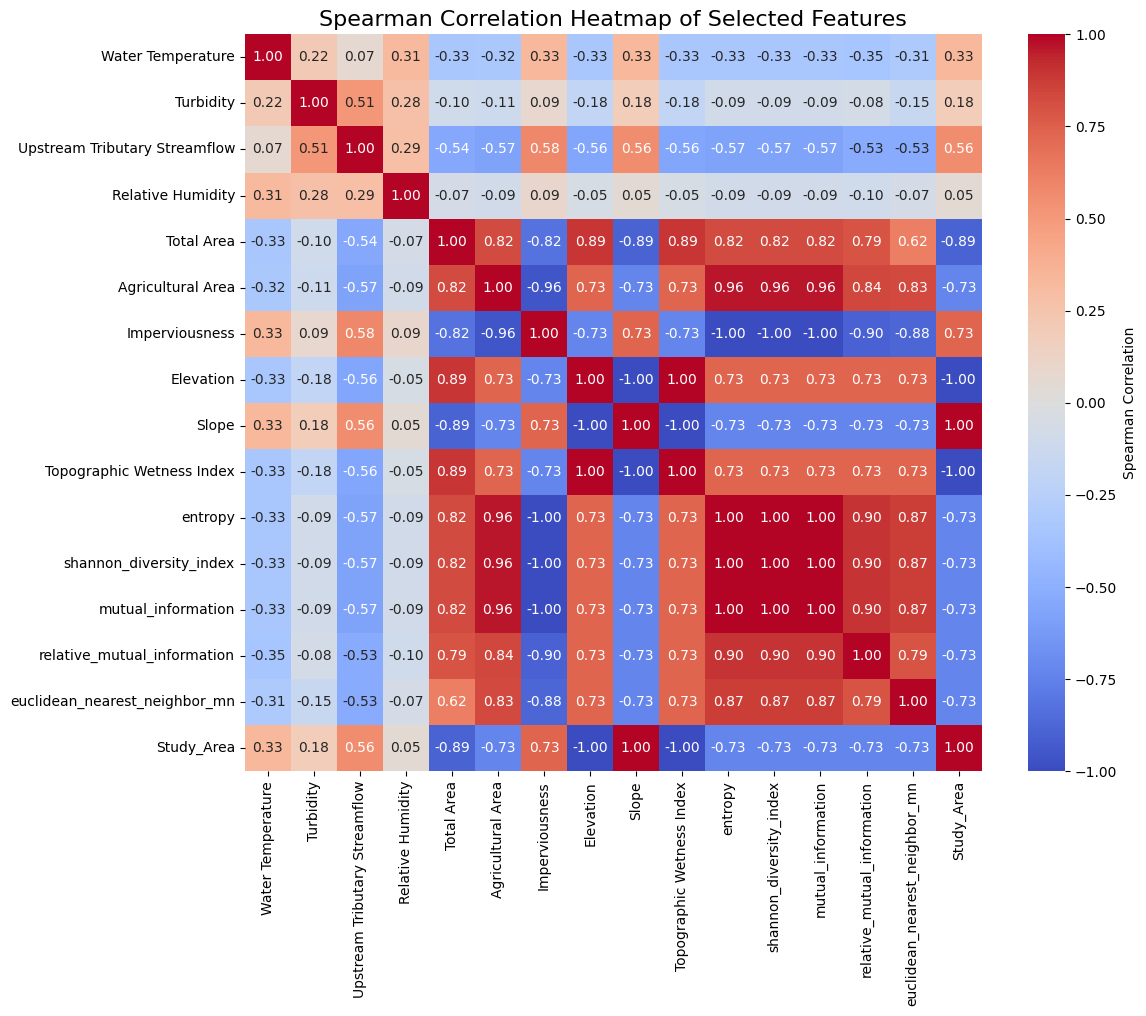

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the dataset with selected features
X_selected = X[selected_features_spearman]

# Compute Spearman correlation matrix among selected features
corr_matrix = X_selected.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Spearman Correlation'})
plt.title("Spearman Correlation Heatmap of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()
